In [1]:
# ALL THE IMPORTS


## TRY TO PUT IN SOME GRAPHS Yo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Open_Univ_Data_Final_merged.csv")

In [3]:
df.head()

,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click,final_result
0,11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,...,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000,Pass
1,28400,AAA,2013J,F,Scotland,HE Qualification,3.0,35-55,0,60,...,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500,Pass
2,31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,...,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715,Pass
3,32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,...,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429,Pass
4,38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,35-55,0,60,...,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902,Pass


In [4]:
df.set_index('id_student',inplace=True)

In [5]:
df.drop(columns=['date_unregistration', 'Exam_score','TMA_score','CMA_score','mean_score','registration_before','unique' ], inplace=True)

In [6]:
df = df.dropna()
df.final_result.value_counts()

Pass           11825
Fail            5612
Withdrawn       4530
Distinction     2825
Name: final_result, dtype: int64

In [7]:
train_cols = df.columns[0:-1]
label = df.columns[-1]

In [8]:
df = df.replace(to_replace ="Distinction", value ="Pass")
df = df.replace(to_replace ="Withdrawn", value ="Fail")
data = df
data = data.replace(to_replace ="Pass", value =1)
data = data.replace(to_replace ="Fail", value =0)
# data = data.replace(to_replace ="Distinction", value =3)
# data = data.replace(to_replace ="Withdrawn", value =0)
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click,final_result
id_student,,,,,,,,,,,,,,,,,,,,,
11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,...,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000,1
28400,AAA,2013J,F,Scotland,HE Qualification,3.0,35-55,0,60,N,...,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500,1
31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,...,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715,1
32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,...,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429,1
38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,35-55,0,60,N,...,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902,1


In [9]:
X = data[train_cols]
X.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click
id_student,,,,,,,,,,,,,,,,,,,,,
11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,...,0.0,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000
28400,AAA,2013J,F,Scotland,HE Qualification,3.0,35-55,0,60,N,...,0.0,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500
31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,...,0.0,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715
32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,...,0.0,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429
38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,35-55,0,60,N,...,0.0,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902


In [10]:
X_enc = pd.get_dummies(X, prefix_sep='.')
X_enc.head()

,imd_band,num_of_prev_attempts,studied_credits,date_registration,date_registration_pos,dataplus,dualpane,externalquiz,folder,forumng,...,highest_education.A Level or Equivalent,highest_education.HE Qualification,highest_education.Lower Than A Level,highest_education.No Formal quals,highest_education.Post Graduate Qualification,age_band.0-35,age_band.35-55,age_band.55<=,disability.N,disability.Y
id_student,,,,,,,,,,,,,,,,,,,,,
11391,10.0,0,240,-159.0,159.0,0.0,0.0,0.0,0.0,193.0,...,0,1,0,0,0,0,0,1,1,0
28400,3.0,0,60,-53.0,53.0,10.0,0.0,0.0,0.0,417.0,...,0,1,0,0,0,0,1,0,1,0
31604,6.0,0,60,-52.0,52.0,2.0,0.0,0.0,0.0,634.0,...,1,0,0,0,0,0,1,0,1,0
32885,6.0,0,60,-176.0,176.0,0.0,0.0,0.0,0.0,194.0,...,0,0,1,0,0,1,0,0,1,0
38053,9.0,0,60,-110.0,110.0,7.0,0.0,0.0,0.0,875.0,...,1,0,0,0,0,0,1,0,1,0


In [11]:
from sklearn.cluster import KMeans

In [13]:
kmean = KMeans(n_clusters=2, verbose=0,tol=1e-3,max_iter=300,n_init=20)

In [14]:
kmean.fit(X_enc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.001, verbose=0)

In [15]:
kmean.cluster_centers_

array([[ 5.29266453e+00,  1.65378088e-01,  7.63367434e+01,
        -6.60753819e+01,  6.60753819e+01,  2.85970206e-01,
         3.00820290e-01,  2.31189893e+00,  9.51348293e-02,
         1.76118565e+02,  2.73844993e+00,  1.76617952e+02,
         1.72213841e-01,  3.20695833e+00,  2.34996323e+02,
         7.99123138e-01,  2.53168490e+01,  1.07509900e+00,
         7.46605695e-01,  1.56608382e+02,  9.42862531e-05,
         3.54494154e+01,  5.98717707e-03,  8.61753253e+01,
         1.52293985e+01,  9.18250566e+02,  5.42389685e+01,
         1.72155323e+01,  2.68244390e-02,  2.71214407e-01,
         1.33509334e-01,  2.09221196e-01,  9.01848011e-02,
         1.70563832e-01,  9.84819913e-02,  1.38129361e-01,
         2.75457288e-01,  2.41467094e-01,  3.44946257e-01,
         4.83264190e-01,  5.16735810e-01,  1.07062040e-01,
         7.44861399e-02,  3.14916085e-02,  9.72562700e-02,
         3.14444654e-02,  8.73562135e-02,  1.10739204e-01,
         6.77918160e-02,  9.78691307e-02,  7.94361682e-0

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(data['final_result'], kmean.labels_))
print(classification_report(data['final_result'], kmean.labels_))
print(accuracy_score(data['final_result'], kmean.labels_))

[[ 9836   306]
 [11374  3276]]
              precision    recall  f1-score   support

           0       0.46      0.97      0.63     10142
           1       0.91      0.22      0.36     14650

    accuracy                           0.53     24792
   macro avg       0.69      0.60      0.49     24792
weighted avg       0.73      0.53      0.47     24792

0.5288802839625686


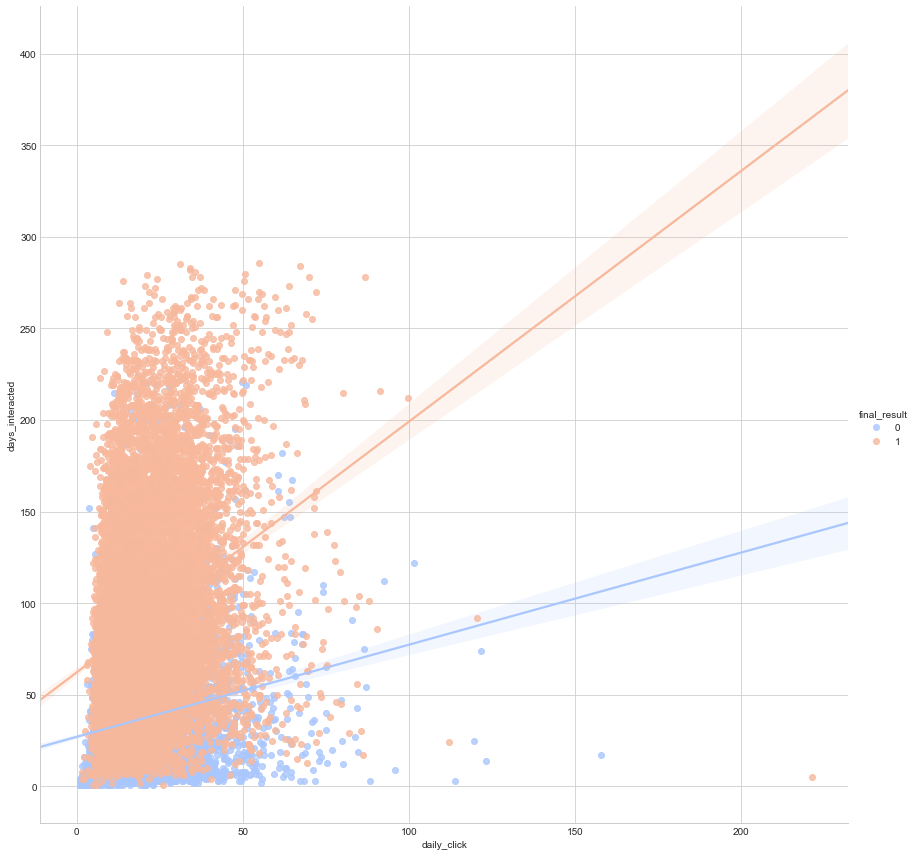

In [17]:
sns.set_style('whitegrid')
sns.lmplot('daily_click','days_interacted',data=data, hue='final_result',
           palette='coolwarm',size=12,aspect=1,fit_reg=True)